<h1>CREDIT CARD FRAUD DETECTION KAGGLE PROJECT</h1>
<h3>By AARUSH SETH</h3>
<p>The aim of this project is to predict the fraud transactions through credit cards of a bank.
        We will use Machine Learning Algorithms to do this task.
</p>

<h4>IMPORTING PACKAGES</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestRegressor,IsolationForest
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor

<h4>IMPORT DATA</h4>

In [2]:
df=pd.read_csv('creditcard.csv')
df   #class=0 for valid transactions and class=1 for fraud transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<h4>DATA EXPLORATION</h4>

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#finding the no. of rows and columns
print("(rows,columns)=",df.shape)

(rows,columns)= (284807, 31)


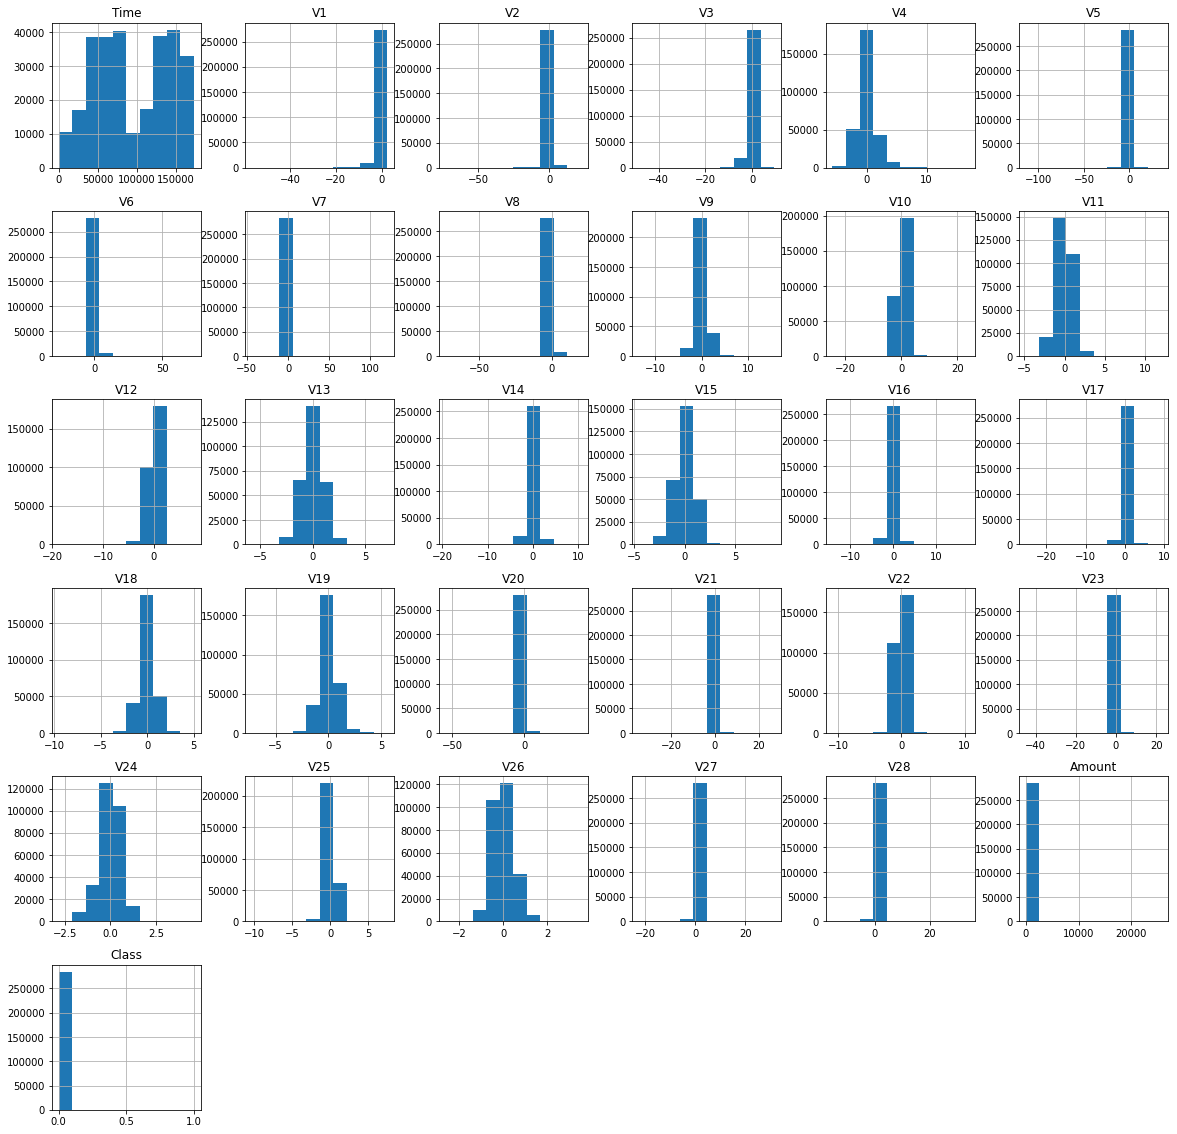

In [6]:
#histograms for each parameters
df.hist(figsize=(20,20))
plt.show()

<p>From the class histogram, we can observe that there are more valid transactions than fraud transactions</p>

<p>Here, we can observe that there are no missing values in the dataframe.
    So, we will not perform the data cleaning step.This data is perfect for data pre-processing</p>

<h4>DATA PRE-PROCESSING</h4>

In [7]:
#finding no. of fraud and valid cases
fraud=df.loc[df['Class']==1]['Class'].count()   #class=1 are fraud transactions
valid=df.loc[df['Class']==0]['Class'].count()   #class=0 are valid transactions
print('fraud cases=',fraud)
print('valid cases=',valid)
print('total=',fraud+valid)
outlier_fraction=fraud/valid
print('percentage of fraud v valid transactions: ',outlier_fraction*100)

fraud cases= 492
valid cases= 284315
total= 284807
percentage of fraud v valid transactions:  0.17304750013189596


In [8]:
#we will predict class
x=df.drop(columns=['Class'])
y=df['Class']   #target class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [9]:
x_train.shape

(227845, 30)

In [10]:
x_test.shape

(56962, 30)

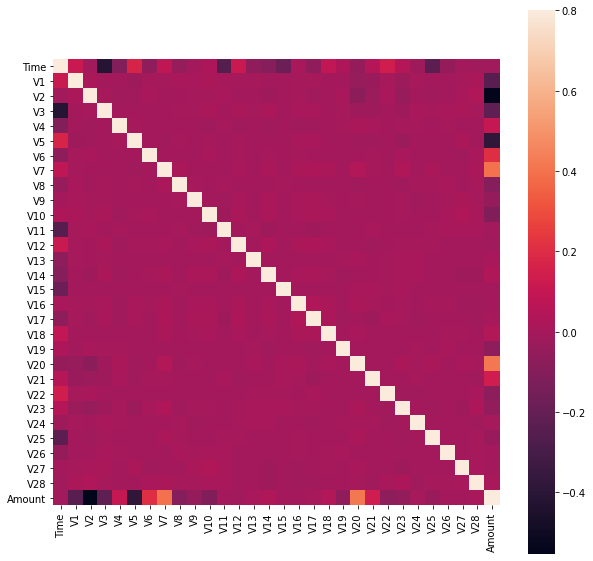

In [11]:
#correlation matrix
corr_mat=x_test.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,vmax=0.8, square=True)
plt.show()

<p>On heat map,the values are correlated with the coloured regions. Less than 0 regions have negatively correlated values and greater than 0 regions have positively correlated values. 0 regions have no coorelated values. So, we can observe that there are max. no correlated regions.</p>

In [12]:
#isolation forest 
IF=IsolationForest(max_samples=len(x),contamination=outlier_fraction,random_state=1)
IF.fit(x_train,y_train)
score_pred=IF.decision_function(x_test)
y_pred=IF.predict(x_test)
n_errors = (y_pred != y_test).sum()
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
print('n_errors {}'.format( n_errors))
print('accuracy score',accuracy_score(y_test, y_pred))
print('classification report\n',classification_report(y_test, y_pred))

C:\Users\aarush\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_iforest.py:288: UserWarning: max_samples (284807) is greater than the total number of samples (227845). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


n_errors 56886
accuracy score 0.9973139988062217
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.32      0.32      0.32       112

    accuracy                           1.00     56962
   macro avg       0.66      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
#local outlier factor
lf=LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
y_pred1 = lf.fit_predict(x_test)
scores_pred = lf.negative_outlier_factor_
n_errors = (y_pred1 != y_test).sum()
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1
print('n_errors {}'.format( n_errors))
print('accuracy score',accuracy_score(y_test, y_pred1))
print('classification report\n',classification_report(y_test, y_pred1))

n_errors 56853
accuracy score 0.9964011095116042
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.03      0.03      0.03       112

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
#decision tree
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred2=dc.predict(x_test)
# y_pred2
print("accuracy score: ",accuracy_score(y_test,y_pred2))

accuracy score:  0.9992451107756047


In [15]:
result_dc=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred2
})
result_dc['Difference']=y_test-y_pred2
result_dc.head()

,Actual,Predicted,Difference
149812,0,0,0
218849,0,0,0
112448,0,0,0
93575,0,0,0
158102,0,0,0


<p>From the accuracy score, we can predict that how much percent we have used the correct approach for data pre-processing</p>